In [1]:
import sympy as sy
from sympy.vector import CoordSys3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
N = CoordSys3D('N')
i=N.i
j=N.j
k=N.k

def norm(BC):
    return sy.sqrt(BC.dot(BC))
def unit(BC):
    return BC/norm(BC)
def projectNorm(v1,v2):
    #projeta v1 em v2
    return v1.dot(unit(v2))
def vector(a,b,c):
    return a*i+b*j+c*k
def subValues(exp,symbolVector,valuesVector):
    for i in range(len(symbolVector)):
        exp=exp.subs(symbolVector[i],valuesVector[i])
    return exp
def angle(v1,v2):
    cos=unit(v1).dot(unit(v2))
    ang=sy.acos(cos)
    return ang #RADIANS!
def solveForces(Forcas,aplicacao,icognitas,debugON=False):
    n=len(Forcas)
    vetorAplicacao=[]
    for f in range(n):
        vetorAplicacao.append(vector(*aplicacao[f]))

    #Somatorio das forcas
    dir=[i,j,k]
    somaF=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaF[d]+=Forcas[f].dot(dir[d])
    #Somatorio dos momentos
    somaM=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaM[d]+=(vetorAplicacao[f].cross(Forcas[f])).dot(dir[d])
    #Resolver equacoes
    equacoes=somaF+somaM
    equacoes = [i for i in equacoes if i != 0] #eliminar zeros
    result=sy.solve(equacoes,*icognitas)
    print(result)
    res=[]

    if(debugON):
        print('Forcas')
        print(Forcas)
        print('Equacoes')
        print(equacoes)
    for icog in range(len(icognitas)):
        res.append(result[icognitas[icog]])

        
    return res
    
def resposta(r,unidade):
    if(unidade==r'^{\circ}'):
        r=np.rad2deg(float(r))
    try:
        value=sy.symbols('{0:.3f}'.format(r)+unidade)
    except:
        #print("symbolic")
        value=r
    display(pd.DataFrame([cell_vars()]).round(2).transpose())
    print('A resposta final é:')
    display(value)

def cell_vars(offset=0):
    import io
    from contextlib import redirect_stdout

    ipy = get_ipython()
    out = io.StringIO()

    with redirect_stdout(out):
        ipy.magic("history {0}".format(ipy.execution_count - offset))

    #process each line...
    x = out.getvalue().replace(" ", "").split("\n")
    x = [a.split("=")[0] for a in x if "=" in a] #all of the variables in the cell
    g = globals()
    result = {k:g[k] for k in x if k in g}
    return result


from IPython.display import Image
from IPython.display import display, Math, Latex
from IPython.core.magic import register_cell_magic


@register_cell_magic
def write_and_run(line, cell):
    argz = line.split()
    file = argz[-1]
    mode = 'w'
    if len(argz) == 2 and argz[0] == '-a':
        mode = 'a'
    with open(file, mode) as f:
        f.write(cell)
    get_ipython().run_cell(cell)

# Questao Bonus

In [2]:
a=4
b=9
c=12
d=17
P=1200
w2=180
w1c=40

In [3]:
Feq1=w1c*b*b/2
Feq2=w2*(d-b)
FRBy=(P*a+Feq1*b*2/3+Feq2/2*(b+d))/c
FRAy=P+Feq1+Feq2-FRBy
x=sy.symbols('x')
V1=FRAy-40*x*x/2
M1=sy.integrate(V1,(x,0,x))
V2=sy.expand(V1.subs(x,a)-P-(w1c*a+w1c*x)*(x-a)/2)
M2=M1.subs(x,a)+sy.integrate(V2,(x,a,x))
V3=V2.subs(x,b)-w2*(x-b)
M3=M2.subs(x,b)+sy.integrate(V3,(x,b,x))
V4=V3.subs(x,c)-w2*(x-c)+FRBy
M4=M3.subs(x,c)+sy.integrate(V4,(x,c,x))
resposta(0,'')

/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
Feq1,1620.0
Feq2,1440
FRBy,2770.0
FRAy,1490.0
x,x
V1,1490.0 - 20*x**2
M1,-6.66666666666667*x**3 + 1490.0*x
V2,290.0 - 20*x**2
M2,-6.66666666666667*x**3 + 290.0*x + 4800.0
V3,290.0 - 180*x


A resposta final é:


0.000

In [4]:
def Vc(xx):
    try:
        n=len(xx)
    except:
        xx=np.array([xx])
        n=1
    V=np.zeros(n)
    for i in range(n):
        if(0<=xx[i]<a):
            try:
                V[i]= V1.subs(x,xx[i])
            except:
                V[i]= V1
        elif(a<=xx[i]<b):
            try:
                V[i]= V2.subs(x,xx[i])
            except:
                V[i]= V2
        elif(b<=xx[i]<c):
            try:
                V[i]= V3.subs(x,xx[i])
            except:
                V[i]= V3
        elif(c<=xx[i]<d):
            try:
                V[i]= V4.subs(x,xx[i])
            except:
                V[i]= V4
        else:
            V[i]= 0
    return V
def Mf(xx):
    try:
        n=len(xx)
    except:
        xx=np.array([xx])
        n=1
    M=np.zeros(n)
    for i in range(n):
        if(0<=xx[i]<a):
            try:
                M[i]= M1.subs(x,xx[i])
            except:
                M[i]= M1
        elif(a<=xx[i]<b):
            try:
                M[i]= M2.subs(x,xx[i])
            except:
                M[i]= M2
        elif(b<=xx[i]<c):
            try:
                M[i]= M3.subs(x,xx[i])
            except:
                M[i]= M3
        elif(c<=xx[i]<d):
            try:
                M[i]= M4.subs(x,xx[i])
            except:
                M[i]= M4

        else:
            M[i]=0
    return M    

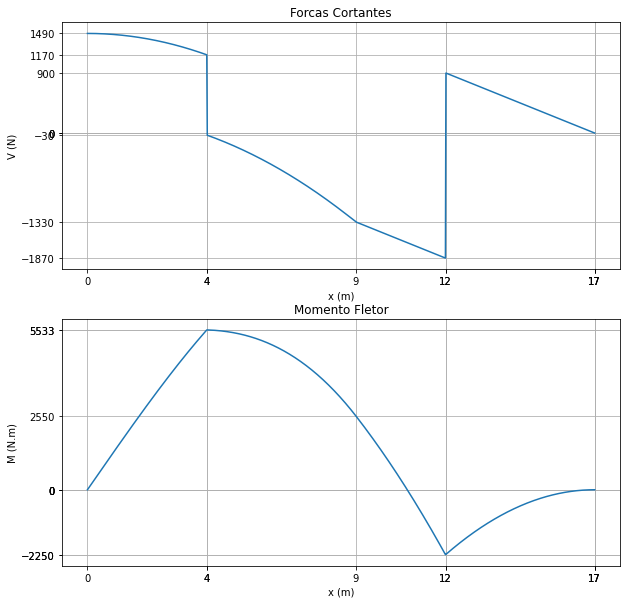

In [5]:
xticks=[0,np.nextafter(a,-1),a,np.nextafter(b,-1),c,np.nextafter(c,-1),d,np.nextafter(d,-1),d]
Vfticks=Vc(xticks)
Mfticks=Mf(xticks)

xx=np.linspace(xticks[0],xticks[-1],1000)
fig, (ax1, ax2) = plt.subplots(2,figsize=(10, 10))
ax1.set_title("Forcas Cortantes")
ax1.set_ylabel("V (N)")
ax1.set_xlabel("x (m)")
ax1.plot(xx,Vc(xx))
ax1.set_yticks(Vfticks)
ax1.set_xticks(xticks)
ax1.grid()


ax2.set_title("Momento Fletor")
ax2.set_ylabel("M (N.m)")
ax2.set_xlabel("x (m)")
ax2.plot(xx,Mf(xx))
ax2.set_yticks(Mfticks)
ax2.set_xticks(xticks)
ax2.grid()

<IPython.core.display.Math object>

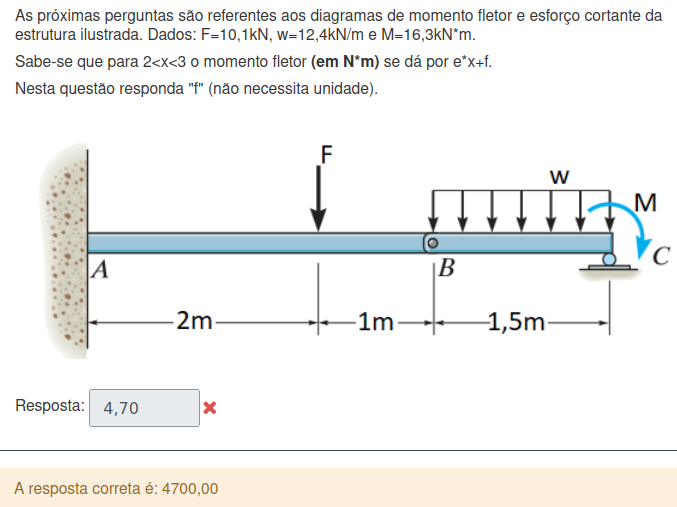

In [6]:
questao='1.1'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [7]:
%%write_and_run ../data/Q6/inputs/{questao}.py
F=10.1
w=12.4
MC=16.3
a=2 
b=1
c=1.5


#referencia
F=700
w=150
MC=800
a=8
b=4
c=6


In [8]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
#F*=1000
#w*=1000
#MC*=1000
By=(-MC+w*c**2/2)/c
FRAy=F+By
MA=F*a+By*(a+b)
x=sy.symbols('x')
V1=FRAy
V2=V1-F
V3=V2-w*(x-3)
M1=-MA+sy.integrate(V1,(x,0,x))
M2=M1.subs(x,2)+sy.integrate(V2,(x,a,x))
M3=M2.subs(x,3)+sy.integrate(V3,(x,a+b,x))

f=M2.subs(x,0)*1000
e=M2.coeff(x)*1000
resposta(f,'')

/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
By,-1.57
FRAy,8.53
MA,15.5
x,x
V1,8.53
V2,-1.57
V3,35.6333333333333 - 12.4*x
M1,8.53333333333333*x - 15.5
M2,4.7 - 1.56666666666667*x
M3,-6.2*x**2 + 35.6333333333333*x - 51.1


A resposta final é:


4700.000

In [9]:
def Vc(xx):
    try:
        n=len(xx)
    except:
        xx=np.array([xx])
        n=1
    V=np.zeros(n)
    for i in range(n):
        if(0<=xx[i]<a):
            try:
                V[i]= V1.subs(x,xx[i])
            except:
                V[i]= V1
        elif(a<=xx[i]<a+b):
            try:
                V[i]= V2.subs(x,xx[i])
            except:
                V[i]= V2
        elif(a+b<=xx[i]<a+b+c):
            try:
                V[i]= V3.subs(x,xx[i])
            except:
                V[i]= V3
        else:
            V[i]= 0
    return V
def Mf(xx):
    try:
        n=len(xx)
    except:
        xx=np.array([xx])
        n=1
    M=np.zeros(n)
    for i in range(n):
        if(0<=xx[i]<a):
            try:
                M[i]= M1.subs(x,xx[i])
            except:
                M[i]= M1
        elif(a<=xx[i]<a+b):
            try:
                M[i]= M2.subs(x,xx[i])
            except:
                M[i]= M2
        elif(a+b<=xx[i]<a+b+c):
            try:
                M[i]= M3.subs(x,xx[i])
            except:
                M[i]= M3
        else:
            M[i]=0
    return M    

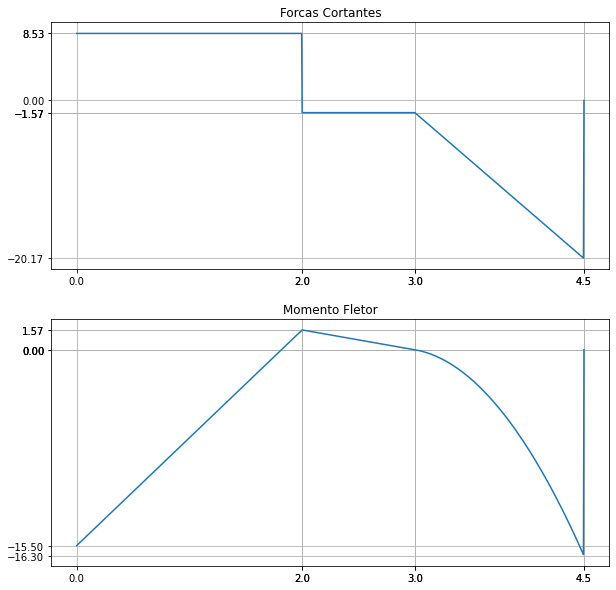

In [10]:
xticks=[0,np.nextafter(a,-1),a,np.nextafter(a+b,-1),a+b,np.nextafter(a+b+c,-1),a+b+c]
Vfticks=Vc(xticks)
Mfticks=Mf(xticks)

xx=np.linspace(xticks[0],xticks[-1],1000)
fig, (ax1, ax2) = plt.subplots(2,figsize=(10, 10))
ax1.set_title("Forcas Cortantes")
ax1.plot(xx,Vc(xx))
ax1.set_yticks(Vfticks)
ax1.set_xticks(xticks)
ax1.grid()


ax2.set_title("Momento Fletor")
ax2.plot(xx,Mf(xx))
ax2.set_yticks(Mfticks)
ax2.set_xticks(xticks)
ax2.grid()

<IPython.core.display.Math object>

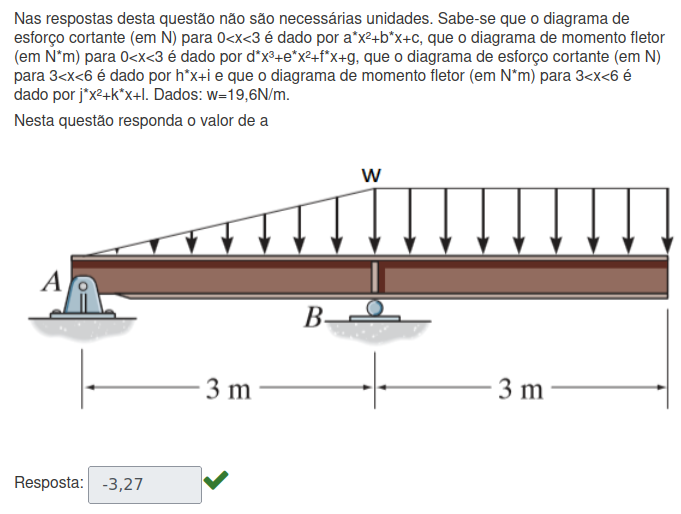

In [11]:
questao='1.2'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [12]:
%%write_and_run ../data/Q6/inputs/{questao}.py
w=19.6


#referencia
w=4


In [13]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
F1=w*3/2
F2=w*3
FRBy=(2*F1+4.5*F2)/3
FRAy=F1+F2-FRBy
a=-w/6
b=0
c=FRAy
VC1=a*3**2+c
d=-1/(2*9)*w
e=0
f=FRAy
g=0
MF1=d*3**3+f*3
h=-w 
i=VC1+FRBy+3*w
j=h/2
k=i
l=MF1-h*9/2-3*i
resposta(a,'')


/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
F1,29.40
F2,58.80
FRBy,107.80
FRAy,-19.60
a,-3.27
b,0.00
c,-19.60
VC1,-49.00
d,-1.09
e,0.00


A resposta final é:


-3.267

<IPython.core.display.Math object>

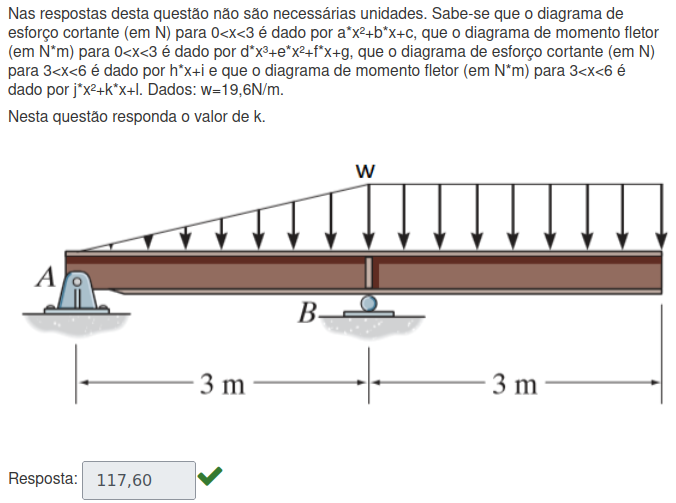

In [14]:
questao='1.3'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [15]:
%%write_and_run ../data/Q6/inputs/{questao}.py
w=19.6


#referencia
w=4


In [16]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
F1=w*3/2
F2=w*3
FRBy=(2*F1+4.5*F2)/3
FRAy=F1+F2-FRBy
a=-w/6
b=0
c=FRAy
VC1=a*3**2+c
d=-1/(2*9)*w
e=0
f=FRAy
g=0
MF1=d*3**3+f*3
h=-w 
i=VC1+FRBy+3*w
j=h/2
k=i
l=MF1-h*9/2-3*i
resposta(k,'')


/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
F1,29.40
F2,58.80
FRBy,107.80
FRAy,-19.60
a,-3.27
b,0.00
c,-19.60
VC1,-49.00
d,-1.09
e,0.00


A resposta final é:


117.600

<IPython.core.display.Math object>

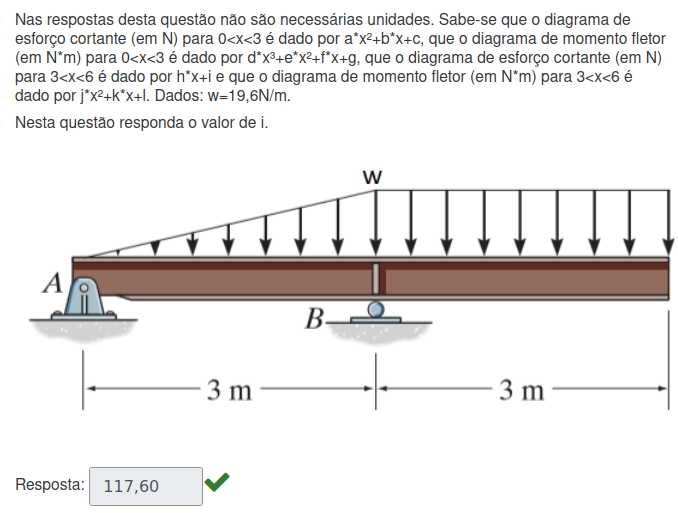

In [17]:
questao='1.4'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [18]:
%%write_and_run ../data/Q6/inputs/{questao}.py
w=19.6

#referencia
w=4

In [19]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
F1=w*3/2
F2=w*3
FRBy=(2*F1+4.5*F2)/3
FRAy=F1+F2-FRBy
a=-w/6
b=0
c=FRAy
VC1=a*3**2+c
d=-1/(2*9)*w
e=0
f=FRAy
g=0
MF1=d*3**3+f*3
h=-w 
i=VC1+FRBy+3*w
j=h/2
k=i
l=MF1-h*9/2-3*i
resposta(i,'')


/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
F1,29.40
F2,58.80
FRBy,107.80
FRAy,-19.60
a,-3.27
b,0.00
c,-19.60
VC1,-49.00
d,-1.09
e,0.00


A resposta final é:


117.600

<IPython.core.display.Math object>

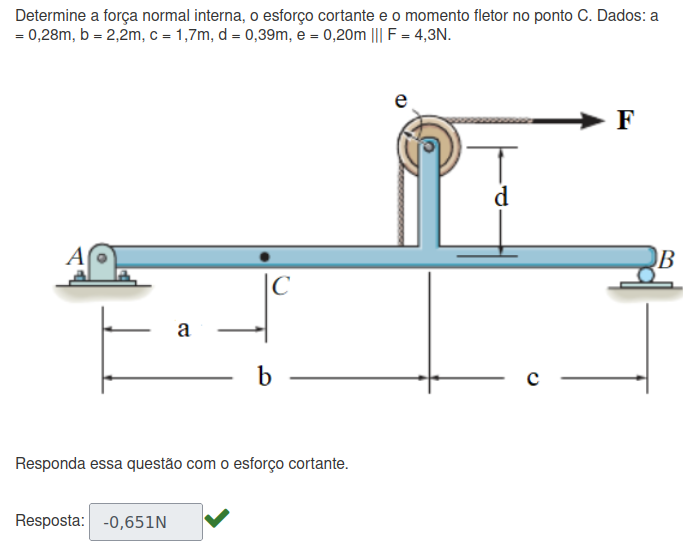

In [20]:
questao='1.5'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [21]:
%%write_and_run ../data/Q6/inputs/{questao}.py
a=0.28
b=2.2
c=1.7
d=0.39
e=0.2
F=4.3



#Referencia
a=1.5
b=3
c=2
d=1
e=0.2
F=400



In [22]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
FRAx=-F
FRBy=F*(d+e)/(b+c)
FRAy=-FRBy
Vc=FRAy 
Vn=-FRAx 
Mf=FRAy*a
resposta(Vc,'N')


/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
FRAx,-4.30
FRBy,0.65
FRAy,-0.65
Vc,-0.65
Vn,4.30
Mf,-0.18


A resposta final é:


-0.651N

<IPython.core.display.Math object>

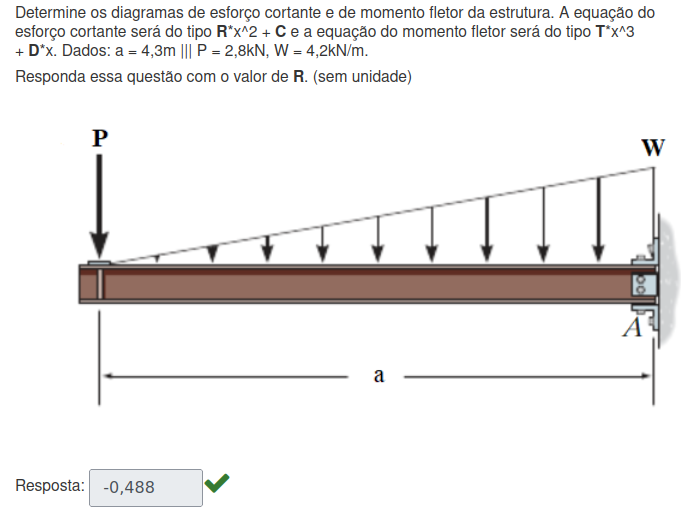

In [23]:
questao='1.6'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [24]:
%%write_and_run ../data/Q6/inputs/{questao}.py
a=4.3
P=2.8
w=4.2


#referencia
P=300
w=200
a=6


In [25]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
F=w*a/2
FRAy=P+F
MA=-a*(P+F/3)
R=-w/(2*a)
C=-P 
T=-w/(6*a)
D=-P 
resposta(R,'')

/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
F,9.03
FRAy,11.83
MA,-24.98
R,-0.49
C,-2.80
T,-0.16
D,-2.80


A resposta final é:


-0.488

<IPython.core.display.Math object>

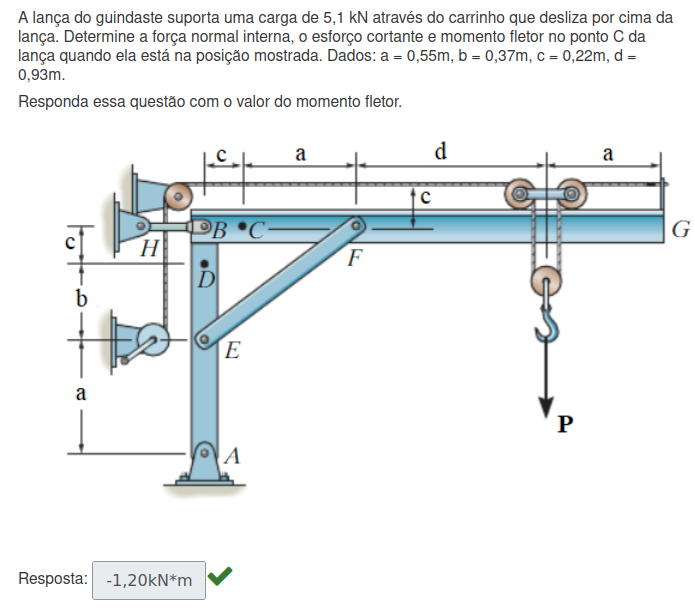

In [26]:
questao='1.7'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [27]:
%%write_and_run ../data/Q6/inputs/{questao}.py
a=0.55
b=0.37
c=0.22
d=0.93
P=5.1


#referencia
a=3
b=2
c=1
d=5
P=750



In [28]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
T=P/2
FEFy=(P*(c+a+d)-T*c)/(c+a)
FEFx=(c+a)/(c+b)*FEFy
By=P-FEFy
Bx=-FEFx+T 
VcC=By 
MfC=(By)*c 
VnC=Bx
resposta(MfC,'kN*m')

/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
T,2.55
FEFy,10.53
FEFx,13.74
By,-5.43
Bx,-11.19
VcC,-5.43
MfC,-1.19
VnC,-11.19


A resposta final é:


-1.195kN*m

<IPython.core.display.Math object>

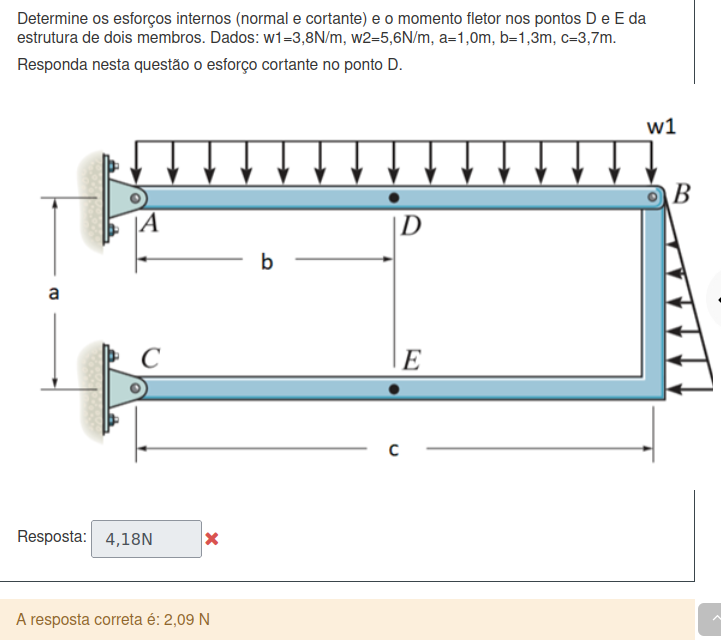

In [29]:
questao='1.8'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [30]:
%%write_and_run ../data/Q6/inputs/{questao}.py
w1=3.8
w2=5.6
a=1
b=1.3
c=3.7


#referencia
a=1.5
b=2
c=4
w1=250
w2=300


In [31]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
F1=w1*c
By=F1*(c/2)/c
FRAy=F1-By 
F2=w2*a/2
Bx=(By*c-F2*a/3)/a
FRAx=-Bx 
FRCy=By 
FRCx=F2+Bx 
VcD=FRAy-w1*b 
VnD=-FRAx 
MfD=FRAy*b-w1*b**2/2 
VcE=FRCy 
VnE=-FRCx 
MfE=FRCy*b 
resposta(VcD,'N')


/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
F1,14.06
By,7.03
FRAy,7.03
F2,2.80
Bx,25.08
FRAx,-25.08
FRCy,7.03
FRCx,27.88
VcD,2.09
VnD,25.08


A resposta final é:


2.090N

<IPython.core.display.Math object>

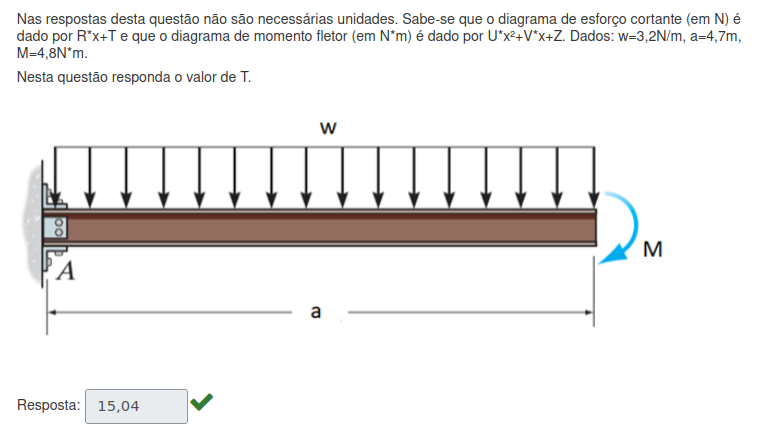

In [32]:
questao='1.9'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [33]:
%%write_and_run ../data/Q6/inputs/{questao}.py
a=4.7
w=3.2
M=4.8


#referencia
w=2
a=2
M=6


In [34]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
F=w*a
FRAy=F
MA=F*a/2+M 
R=-w 
T=FRAy 
U=-w/2 
V=FRAy 
Z=-MA 
resposta(T,'')


/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
F,15.04
FRAy,15.04
MA,40.14
R,-3.20
T,15.04
U,-1.60
V,15.04
Z,-40.14


A resposta final é:


15.040

<IPython.core.display.Math object>

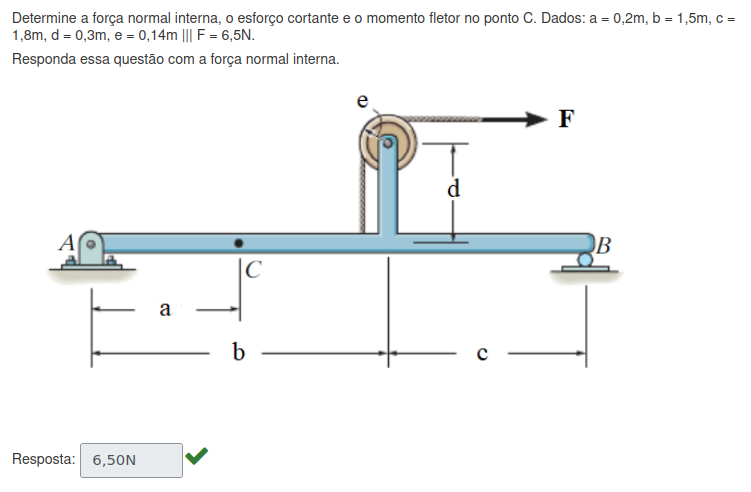

In [35]:
questao='1.10'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [36]:
%%write_and_run ../data/Q6/inputs/{questao}.py
a=0.2
b=1.5
c=1.8
d=0.3
e=0.14
F=6.5


#Referencia
a=1.5
b=3
c=2
d=1
e=0.2
F=400



In [37]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
FRAx=-F
FRBy=F*(d+e)/(b+c)
FRAy=-FRBy
Vc=FRAy 
Vn=-FRAx 
Mf=FRAy*a
resposta(Vn,'N')


/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
FRAx,-6.50
FRBy,0.87
FRAy,-0.87
Vc,-0.87
Vn,6.50
Mf,-0.17


A resposta final é:


6.500N

<IPython.core.display.Math object>

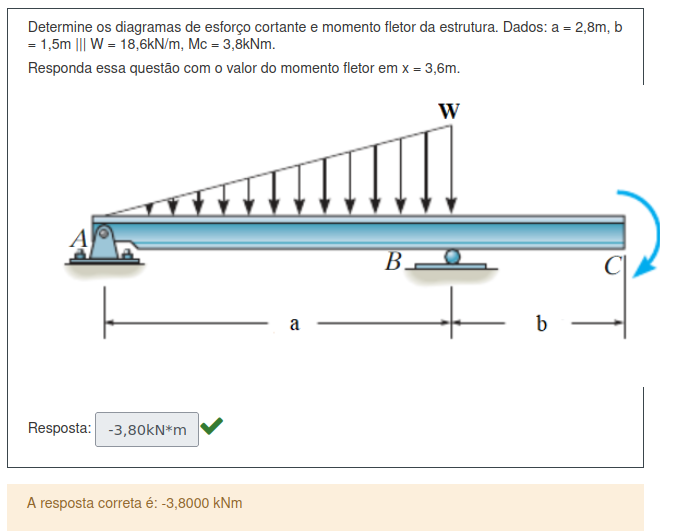

In [38]:
questao='2.1'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [39]:
%%write_and_run ../data/Q6/inputs/{questao}.py
a=2.8
b=1.5
w=18.6
MC=3.8
xx=3.6


#Referencia
a=9
b=4.5
w=30
MC=180



In [40]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
x=sy.symbols('x')
F=w*a/2
FRAx=0
FRBy=(MC+2/3*a*F)/a
FRAy=-FRBy+F 
Vc1=FRAy-w*x**2/(2*a)
Mf1=FRAy*x-w*x**3/(6*a)
Vc2=0
Mf2=Mf1
def Vc(xx,Vc1,Vc2):
    x=sy.symbols('x')
    if(0<=xx<a):
        return Vc1.subs(x,xx)
    elif(a<=xx<a+b):
        return Vc2
    else:
        return 0
    
def Mf(xx,Mf1,Mf2):
    x=sy.symbols('x')
    if(0<=xx<a):
        return Mf1.subs(x,xx)
    elif(a<=xx<a+b):
        return Mf2
    else:
        return 0
Mf2=Mf1.subs(x,a)
Mf_value=Mf(xx,Mf1,Mf2)
Vc_value=Vc(xx,Vc1,Vc2) 
resposta(Mf_value,'kN*m')


/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
x,x
F,26.04
FRAx,0
FRBy,18.72
FRAy,7.32
Vc1,7.32285714285715 - 3.32142857142857*x**2
Mf1,-1.10714285714286*x**3 + 7.32285714285715*x
Vc2,0
Mf2,-3.80000000000000
Mf_value,-3.80000000000000


A resposta final é:


-3.800kN*m

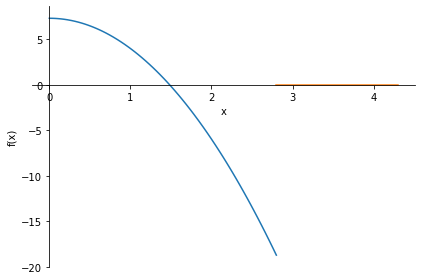

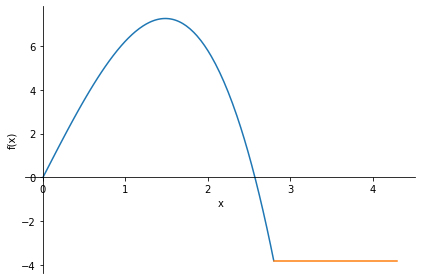

In [41]:
x=sy.symbols('x')
sy.plot((Vc1,(x,0,a)),(Vc2,(x,a,a+b)))
sy.plot((Mf1,(x,0,a)),(Mf2,(x,a,a+b)))

<IPython.core.display.Math object>

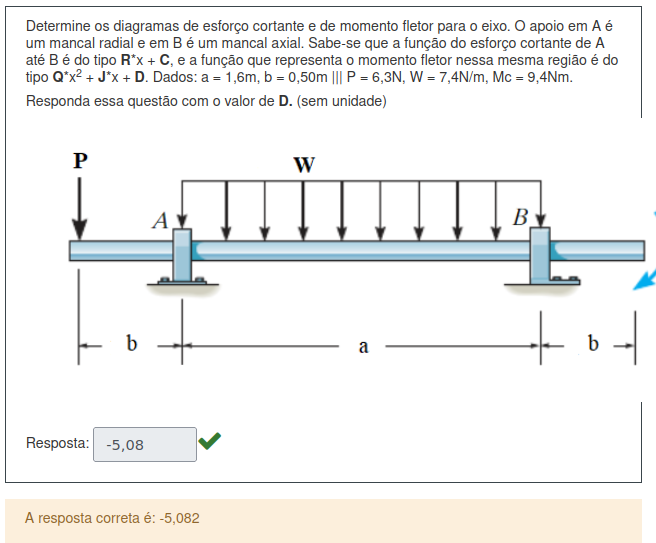

In [42]:
questao='2.2'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [43]:
%%write_and_run ../data/Q6/inputs/{questao}.py
P=6.3
a=1.6
b=0.5
w=7.4
MC=9.4


#Referencia
P=200
a=4
b=1
w=100
MC=300


In [44]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
x=sy.symbols('x')
F=w*a
FRAx=0
FRBy=(-P*b+MC+a*F/2)/a
FRAy=-FRBy+F+P 
Vc1=-P
Mf1=Vc1*x
Vc2=Vc1+FRAy-w*(x-b) 
Mf2=Mf1.subs(x,b)+sy.integrate(Vc2,(x,b,x))

Vc3=0
Mf3=Mf2.subs(x,a+b)
Vc4=0
Mf4=0

R=Vc2.coeff(x)
C=Vc2.subs(x,0)
Q=Mf2.coeff(x**2)
J=Mf2.coeff(x)
D=Mf2.subs(x,0)


resposta(D,'')


/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
x,x
F,11.84
FRAx,0
FRBy,9.83
FRAy,8.31
Vc1,-6.3
Mf1,-6.3*x
Vc2,5.71375 - 7.4*x
Mf2,-3.7*x**2 + 5.71375*x - 5.081875
Vc3,0


A resposta final é:


-5.082

In [45]:
def Vc(xx):
    try:
        n=len(xx)
    except:
        xx=np.array([xx])
        n=1
    V=np.zeros(n)
    for i in range(n):
        if(0<=xx[i]<b):
            V[i]= Vc1
        elif(b<=xx[i]<a+b):
            V[i]=  Vc2.subs(x,xx[i])
        elif(a+b<=xx[i]<a+b+b):
            V[i]= Vc3
        else:
            V[i]= Vc4    
    return V
def Mf(xx):
    try:
        n=len(xx)
    except:
        xx=np.array([xx])
        n=1
    M=np.zeros(n)
    for i in range(n):
        if(0<=xx[i]<b):
            M[i]=Mf1.subs(x,xx[i])
        elif(b<=xx[i]<a+b):
            M[i]= Mf2.subs(x,xx[i])
        elif(a+b<=xx[i]<a+b+b):
            M[i]= Mf3.subs(x,xx[i])
        else:
            M[i]= 0
    return M     

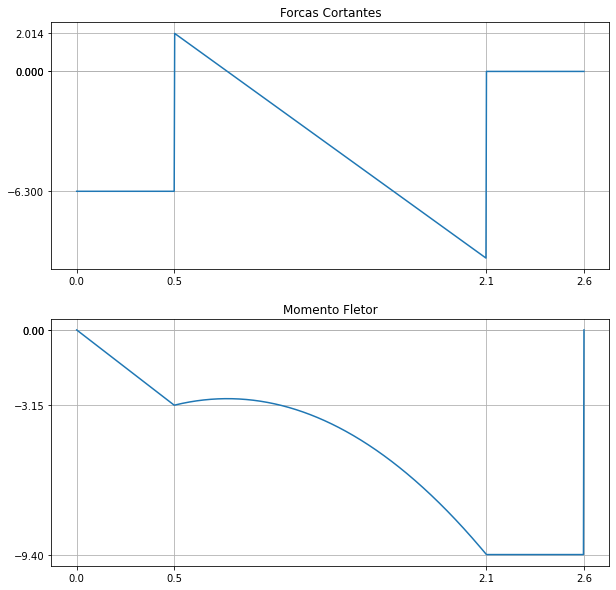

In [46]:
xticks=[0,b,a+b,a+b+b]
Vfticks=Vc(xticks)
Mfticks=Mf(xticks)

xx=np.linspace(xticks[0],xticks[-1],1000)
fig, (ax1, ax2) = plt.subplots(2,figsize=(10, 10))
ax1.set_title("Forcas Cortantes")
ax1.plot(xx,Vc(xx))
ax1.set_yticks(Vfticks)
ax1.set_xticks(xticks)
ax1.grid()


ax2.set_title("Momento Fletor")
ax2.plot(xx,Mf(xx))
ax2.set_yticks(Mfticks)
ax2.set_xticks(xticks)
ax2.grid()
    

<IPython.core.display.Math object>

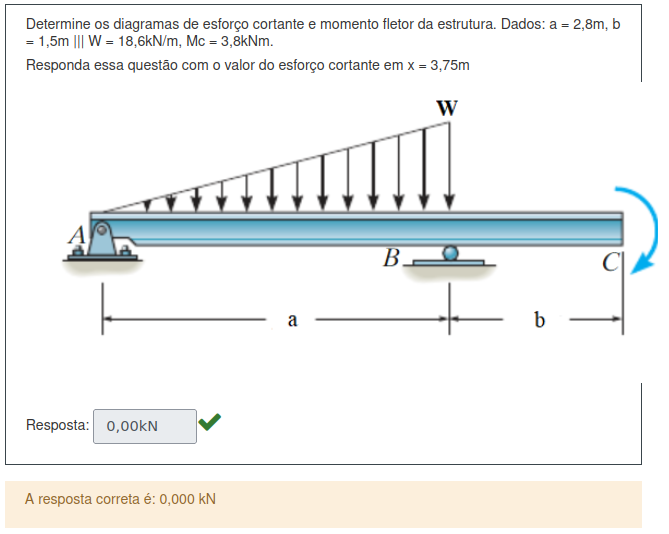

In [47]:
questao='2.3'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [48]:
%%write_and_run ../data/Q6/inputs/{questao}.py
a=2.8
b=1.5
w=18.6
MC=3.8
xx=3.75


#Referencia
a=9
b=4.5
w=30
MC=180



In [49]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
x=sy.symbols('x')
F=w*a/2
FRAx=0
FRBy=(MC+2/3*a*F)/a
FRAy=-FRBy+F 
Vc1=FRAy-w*x**2/(2*a)
Mf1=FRAy*x-w*x**3/(6*a)
Vc2=0
Mf2=Mf1
def Vc(xx,Vc1,Vc2):
    x=sy.symbols('x')
    if(0<=xx<a):
        return Vc1.subs(x,xx)
    elif(a<=xx<a+b):
        return Vc2
    else:
        return 0
    
def Mf(xx,Mf1,Mf2):
    x=sy.symbols('x')
    if(0<=xx<a):
        return Mf1.subs(x,xx)
    elif(a<=xx<a+b):
        return Mf2
    else:
        return 0
Mf2=Mf1.subs(x,a)
Mf_value=Mf(xx,Mf1,Mf2)
Vc_value=Vc(xx,Vc1,Vc2) 
resposta(Vc_value,'kN*m')


/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
x,x
F,26.04
FRAx,0
FRBy,18.72
FRAy,7.32
Vc1,7.32285714285715 - 3.32142857142857*x**2
Mf1,-1.10714285714286*x**3 + 7.32285714285715*x
Vc2,0
Mf2,-3.80000000000000
Mf_value,-3.80000000000000


A resposta final é:


0.000kN*m

<IPython.core.display.Math object>

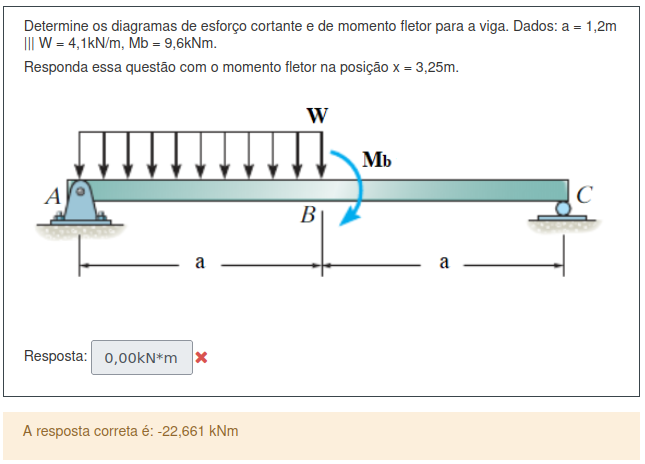

In [50]:
questao='2.4'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [51]:
%%write_and_run ../data/Q6/inputs/{questao}.py
a=1.2
w=4.1
MB=9.6
xvalue=3.25

a=2
w=4.6
MB=6.4
xvalue=3.5


#Referencia
a=5
w=2
MB=50



In [52]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
x=sy.symbols('x')
F=w*a
FRAx=0
FRCy=(MB+a*F/2)/(2*a)
FRAy=-FRCy+F 
Vc1=FRAy-w*x
Mf1=sy.integrate(Vc1,x)
Vc2=Vc1.subs(x,a)
Mf2=Mf1.subs(x,a)+MB+sy.integrate(Vc2,(x,a,x))
def Vc(xx,Vc1,Vc2):
    x=sy.symbols('x')
    try:
        n=len(xx)
    except:
        xx=np.array([xx])
        n=1
    V=np.zeros(n)
    for i in range(n):
        if(0<=xx[i]<a):
            V[i]= Vc1.subs(x,xx[i])
        elif(a<=xx[i]<2*a):
            V[i]=  Vc2
        else:
            V[i]= 0
    return V
def Mf(xx,Mf1,Mf2):
    x=sy.symbols('x')
    try:
        n=len(xx)
    except:
        xx=np.array([xx])
        n=1
    M=np.zeros(n)
    for i in range(n):
        if(0<=xx[i]<a):
            M[i]=Mf1.subs(x,xx[i])
        elif(a<=xx[i]<2*a):
            M[i]=Mf2.subs(x,xx[i])
        else:
            M[i]= 0
    return M
Mf_Value=Mf(xvalue,Mf1,Mf2)[0]
Vc_value=Vc(xvalue,Vc1,Vc2)[0]    
resposta(Mf(xvalue,Mf1,Mf2)[0],'kN*m')


/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
x,x
F,4.92
FRAx,0
FRCy,5.23
FRAy,-0.31
Vc1,-4.1*x - 0.310000000000001
Mf1,-2.05*x**2 - 0.310000000000001*x
Vc2,-5.23000000000000
Mf2,12.552 - 5.23*x
xx,3.75


A resposta final é:


0.000kN*m

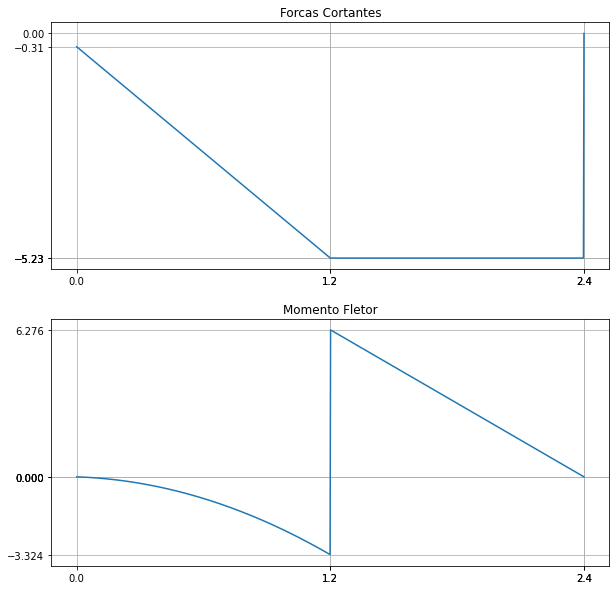

In [53]:
xticks=[0,np.nextafter(a,-1),a,np.nextafter(2*a,-1),2*a]
Vfticks=Vc(xticks,Vc1,Vc2)
Mfticks=Mf(xticks,Mf1,Mf2)

xx=np.linspace(xticks[0],xticks[-1],1000)
fig, (ax1, ax2) = plt.subplots(2,figsize=(10, 10))
ax1.set_title("Forcas Cortantes")
ax1.plot(xx,Vc(xx,Vc1,Vc2))
ax1.set_yticks(Vfticks)
ax1.set_xticks(xticks)
ax1.grid()


ax2.set_title("Momento Fletor")
ax2.plot(xx,Mf(xx,Mf1,Mf2))
ax2.set_yticks(Mfticks)
ax2.set_xticks(xticks)
ax2.grid()

<IPython.core.display.Math object>

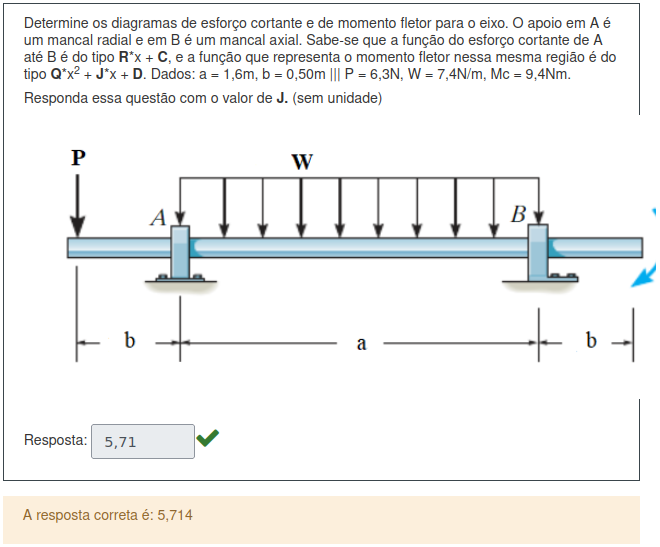

In [54]:
questao='2.5'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [55]:
%%write_and_run ../data/Q6/inputs/{questao}.py
a=1.6
b=0.5
w=7.4
MC=9.4
P=6.3


#Referencia
P=200
a=4
b=1
w=100
MC=300


In [56]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
x=sy.symbols('x')
F=w*a
FRAx=0
FRBy=(-P*b+MC+a*F/2)/a
FRAy=-FRBy+F+P 
Vc1=-P
Mf1=Vc1*x
Vc2=Vc1+FRAy-w*(x-b) 
Mf2=Mf1.subs(x,b)+sy.integrate(Vc2,(x,b,x))

Vc3=0
Mf3=Mf2.subs(x,a+b)
Vc4=0
Mf4=0

R=Vc2.coeff(x)
C=Vc2.subs(x,0)
Q=Mf2.coeff(x**2)
J=Mf2.coeff(x)
D=Mf2.subs(x,0)


resposta(J,'')


/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
x,x
F,11.84
FRAx,0
FRBy,9.83
FRAy,8.31
Vc1,-6.3
Mf1,-6.3*x
Vc2,5.71375 - 7.4*x
Mf2,-3.7*x**2 + 5.71375*x - 5.081875
Vc3,0


A resposta final é:


5.714

In [57]:
def Vc(xx):
    try:
        n=len(xx)
    except:
        xx=np.array([xx])
        n=1
    V=np.zeros(n)
    for i in range(n):
        if(0<=xx[i]<b):
            V[i]= Vc1
        elif(b<=xx[i]<a+b):
            V[i]=  Vc2.subs(x,xx[i])
        elif(a+b<=xx[i]<a+b+b):
            V[i]= Vc3
        else:
            V[i]= Vc4    
    return V
def Mf(xx):
    try:
        n=len(xx)
    except:
        xx=np.array([xx])
        n=1
    M=np.zeros(n)
    for i in range(n):
        if(0<=xx[i]<b):
            M[i]=Mf1.subs(x,xx[i])
        elif(b<=xx[i]<a+b):
            M[i]= Mf2.subs(x,xx[i])
        elif(a+b<=xx[i]<a+b+b):
            M[i]= Mf3.subs(x,xx[i])
        else:
            M[i]= 0
    return M     

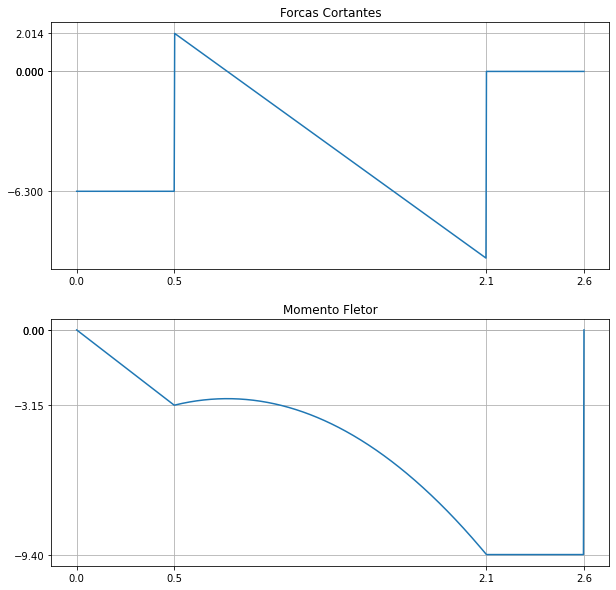

In [58]:
xticks=[0,b,a+b,a+b+b]
Vfticks=Vc(xticks)
Mfticks=Mf(xticks)

xx=np.linspace(xticks[0],xticks[-1],1000)
fig, (ax1, ax2) = plt.subplots(2,figsize=(10, 10))
ax1.set_title("Forcas Cortantes")
ax1.plot(xx,Vc(xx))
ax1.set_yticks(Vfticks)
ax1.set_xticks(xticks)
ax1.grid()


ax2.set_title("Momento Fletor")
ax2.plot(xx,Mf(xx))
ax2.set_yticks(Mfticks)
ax2.set_xticks(xticks)
ax2.grid()
    

<IPython.core.display.Math object>

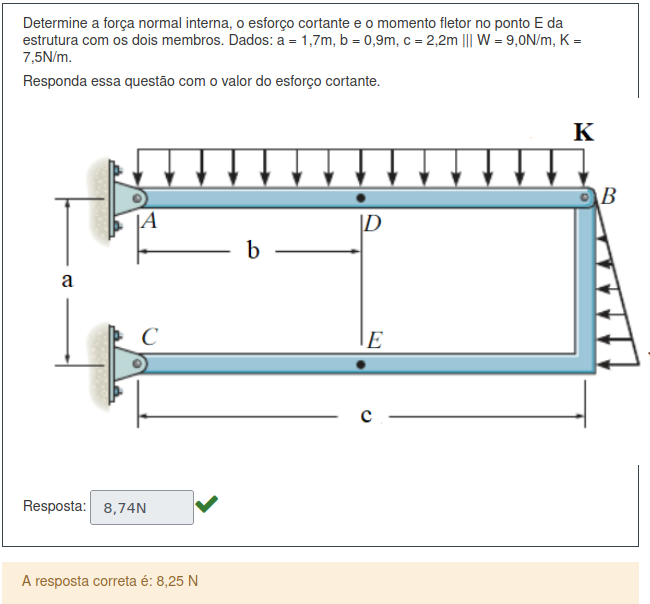

In [59]:
questao='2.6'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [60]:
%%write_and_run ../data/Q6/inputs/{questao}.py
k=7.5
w=9.0
a=1.7
b=0.9
c=2.2


#referencia
a=1.5
b=2
c=4
k=250
w=300


In [61]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
F1=k*c
By=F1*(c/2)/c
FRAy=F1-By 
F2=w*a/2
Bx=(By*c-F2*a/3)/a
FRAx=-Bx 
FRCy=By 
FRCx=F2+Bx 
VcD=FRAy-k*b 
VnD=-FRAx 
MfD=FRAy*b-k*b**2/2 
VcE=FRCy 
VnE=-FRCx 
MfE=FRCy*b 
resposta(VcE,'N')


/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
F1,16.50
By,8.25
FRAy,8.25
F2,7.65
Bx,8.13
FRAx,-8.13
FRCy,8.25
FRCx,15.78
VcD,1.50
VnD,8.13


A resposta final é:


8.250N

<IPython.core.display.Math object>

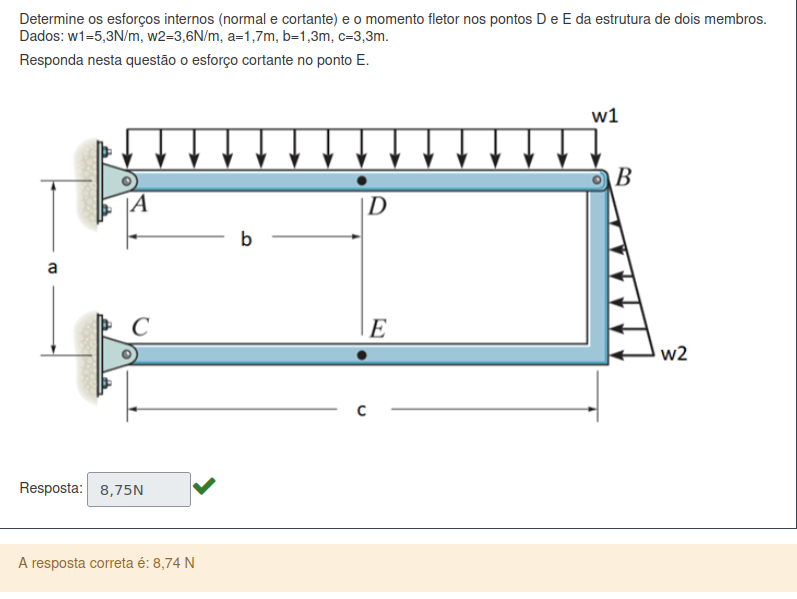

In [62]:
questao='2.7'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [63]:
%%write_and_run ../data/Q6/inputs/{questao}.py
w1=5.3
w2=3.6
a=1.7
b=1.3
c=3.3


#referencia
a=1.5
b=2
c=4
w1=250
w2=300


In [64]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
F1=w1*c
By=F1*(c/2)/c
FRAy=F1-By 
F2=w2*a/2
Bx=(By*c-F2*a/3)/a
FRAx=-Bx 
FRCy=By 
FRCx=F2+Bx 
VcD=FRAy-w1*b 
VnD=-FRAx 
MfD=FRAy*b-w1*b**2/2 
VcE=FRCy 
VnE=-FRCx 
MfE=FRCy*b 
resposta(VcE,'N')


/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
F1,17.49
By,8.74
FRAy,8.74
F2,3.06
Bx,15.96
FRAx,-15.96
FRCy,8.74
FRCx,19.02
VcD,1.85
VnD,15.96


A resposta final é:


8.745N

<IPython.core.display.Math object>

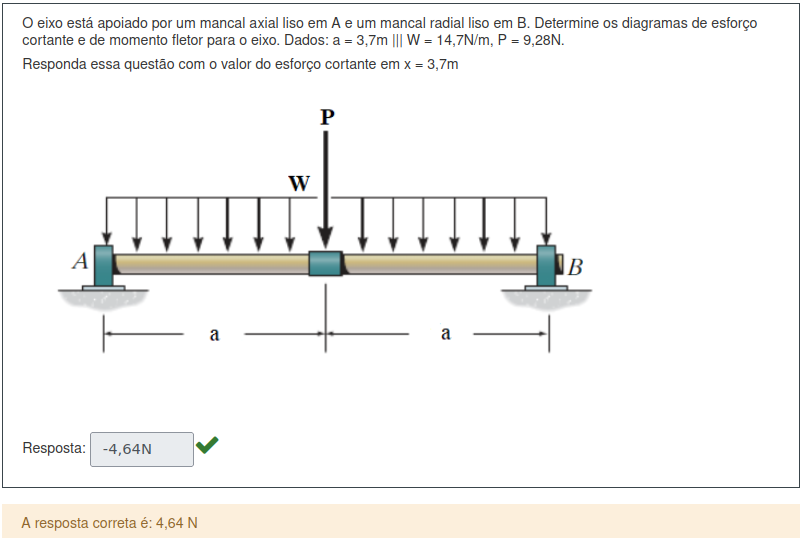

In [65]:
questao='2.8'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [66]:
%%write_and_run ../data/Q6/inputs/{questao}.py
w=14.7
a=3.7
P=9.28


#referencia
a=1.5
P=500
w=300


In [67]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
x=sy.symbols('x')
F=w*2*a 
FRBy=(P+F)/2 
FRAy=P+F-FRBy 
Vc1=FRAy-w*x
Mf1=sy.integrate(Vc1,x)
Vc2=Vc1.subs(x,a)-P-w*(x-a) 
Mf2=Mf1.subs(x,a)+sy.integrate(Vc2,(x,a,x))
resposta(Vc2.subs(x,a),'N')

/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
x,x
F,108.78
FRBy,59.03
FRAy,59.03
Vc1,59.03 - 14.7*x
Mf1,-7.35*x**2 + 59.03*x
Vc2,49.75 - 14.7*x
Mf2,-7.35*x**2 + 49.75*x + 34.336


A resposta final é:


-4.640N

In [68]:
def Vc(xx):
    try:
        n=len(xx)
    except:
        xx=np.array([xx])
        n=1
    V=np.zeros(n)
    for i in range(n):
        if(0<=xx[i]<a):
            V[i]= Vc1.subs(x,xx[i])
        elif(a<=xx[i]<2*a):
            V[i]=  Vc2.subs(x,xx[i])
        else:
            V[i]= 0
    return V
def Mf(xx):
    try:
        n=len(xx)
    except:
        xx=np.array([xx])
        n=1
    M=np.zeros(n)
    for i in range(n):
        if(0<=xx[i]<a):
            M[i]=Mf1.subs(x,xx[i])
        elif(a<=xx[i]<2*a):
            M[i]= Mf2.subs(x,xx[i])
        else:
            M[i]= 0
    return M     

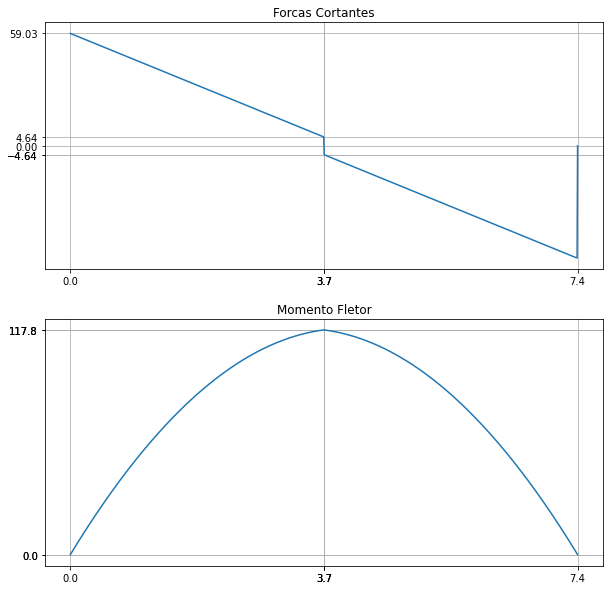

In [69]:
xticks=[0,np.nextafter(a,-1),a,np.nextafter(a,2*a),2*a]
Vfticks=Vc(xticks)
Mfticks=Mf(xticks)

xx=np.linspace(xticks[0],xticks[-1],1000)
fig, (ax1, ax2) = plt.subplots(2,figsize=(10, 10))
ax1.set_title("Forcas Cortantes")
ax1.plot(xx,Vc(xx))
ax1.set_yticks(Vfticks)
ax1.set_xticks(xticks)
ax1.grid()


ax2.set_title("Momento Fletor")
ax2.plot(xx,Mf(xx))
ax2.set_yticks(Mfticks)
ax2.set_xticks(xticks)
ax2.grid()
    

<IPython.core.display.Math object>

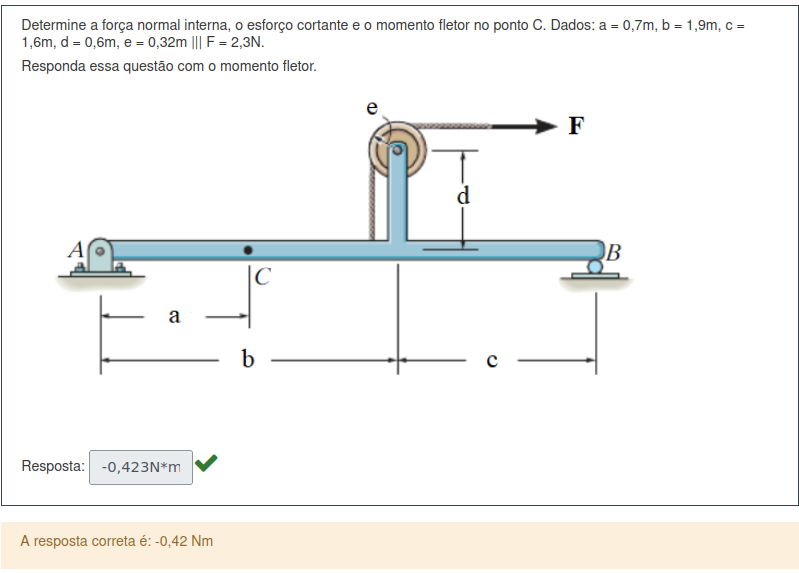

In [70]:
questao='2.9'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [71]:
%%write_and_run ../data/Q6/inputs/{questao}.py
a=0.7
b=1.9
c=1.6
d=0.6
e=0.32
F=2.3



#Referencia
a=1.5
b=3
c=2
d=1
e=0.2
F=400



In [72]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
FRAx=-F
FRBy=F*(d+e)/(b+c)
FRAy=-FRBy
Vc=FRAy 
Vn=-FRAx 
Mf=FRAy*a
resposta(Mf,'N*m')


/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
FRAx,-2.30
FRBy,0.60
FRAy,-0.60
Vc,-0.60
Vn,2.30
Mf,-0.42


A resposta final é:


-0.423N*m

<IPython.core.display.Math object>

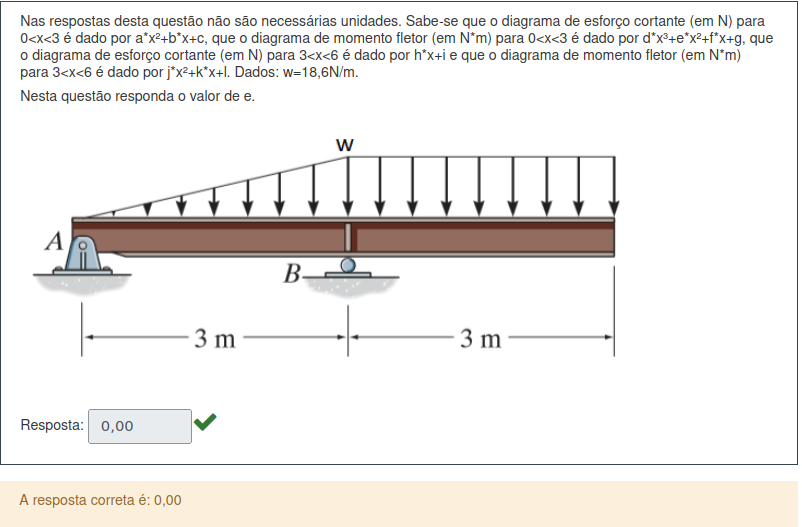

In [73]:
questao='2.10'
display(Math(r'\Large{'+questao+')}'))
Image(filename='../data/Q6/images/'+questao+'.png') 

In [74]:
%%write_and_run ../data/Q6/inputs/{questao}.py
w=18.6

In [75]:

#referencia
w=4


In [76]:
%%write_and_run ../data/Q6/resolutions/{questao}.py
F1=w*3/2
F2=w*3
FRBy=(2*F1+4.5*F2)/3
FRAy=F1+F2-FRBy
a=-w/6
b=0
c=FRAy
VC1=a*3**2+c
d=-1/(2*9)*w
e=0
f=FRAy
g=0
MF1=d*3**3+f*3
h=-w 
i=VC1+FRBy+3*w
j=h/2
k=i
l=MF1-h*9/2-3*i
resposta(e,'')


/tmp/ipykernel_52585/3621424017.py:83: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipy.magic("history {0}".format(ipy.execution_count - offset))


,0
F1,6.00
F2,12.00
FRBy,22.00
FRAy,-4.00
a,-0.67
b,0.00
c,-4.00
VC1,-10.00
d,-0.22
e,0.00


A resposta final é:


0.000